In [519]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [520]:
heartrate_df = pd.read_csv("own heart_rate.csv")
calories_df = pd.read_csv("own callories.csv")
steps_df = pd.read_csv("own steps.csv")

In [521]:
heartrate_df['startTime'] = pd.to_datetime(heartrate_df['startTime']).dt.floor('1T')
calories_df['startTime'] = pd.to_datetime(calories_df['startTime']).dt.floor('1T')
steps_df['startTime'] = pd.to_datetime(steps_df['startTime']).dt.floor('1T')

/var/folders/cz/zhfvfw117t1d5x8lgy4wfqc40000gn/T/ipykernel_16123/506347079.py:1: UserWarning: Parsing dates in %d.%m.%Y, %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  heartrate_df['startTime'] = pd.to_datetime(heartrate_df['startTime']).dt.floor('1T')
/var/folders/cz/zhfvfw117t1d5x8lgy4wfqc40000gn/T/ipykernel_16123/506347079.py:2: UserWarning: Parsing dates in %d.%m.%Y, %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  calories_df['startTime'] = pd.to_datetime(calories_df['startTime']).dt.floor('1T')
/var/folders/cz/zhfvfw117t1d5x8lgy4wfqc40000gn/T/ipykernel_16123/506347079.py:3: UserWarning: Parsing dates in %d.%m.%Y, %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  steps_df['startTime'] = pd.to_datetime(steps_df['startTime']).dt.floor

In [522]:
merged_df = pd.merge_asof(heartrate_df.sort_values('startTime'), 
                          calories_df.sort_values('startTime'),
                          on='startTime', 
                          suffixes=('_hr', '_cal'))

In [523]:
final_df = pd.merge_asof(merged_df, steps_df.sort_values('startTime'), on='startTime')

In [524]:
final_df = pd.merge_asof(merged_df, steps_df.sort_values('startTime'), on='startTime')
final_df.rename(columns={'heart_rate': 'Heart Rate', 'callories': 'Calories', 'steps': 'Steps'}, inplace=True)

In [525]:
final_df.drop(['endTime_hr', 'endTime_cal', 'endTime'], axis=1, inplace=True)

In [526]:
final_df

,startTime,Heart Rate,Calories,Steps
0,2024-03-26 00:00:00,69.0,658.749671,NaN
1,2024-03-26 00:05:00,67.0,658.749671,NaN
2,2024-03-26 00:10:00,68.0,658.749671,NaN
3,2024-03-26 00:16:00,67.0,658.749671,NaN
4,2024-03-26 00:21:00,66.0,658.749671,NaN
...,...,...,...,...
2227,2024-04-02 21:49:00,91.0,39.248850,38.0
2228,2024-04-02 21:50:00,87.0,39.248850,38.0
2229,2024-04-02 21:53:00,87.0,39.248850,55.0
2230,2024-04-02 21:58:00,86.0,39.248850,55.0


In [527]:
final_df.dropna()

,startTime,Heart Rate,Calories,Steps
7,2024-03-26 00:33:00,65.0,658.749671,10.0
8,2024-03-26 00:36:00,66.0,658.749671,10.0
9,2024-03-26 00:41:00,65.0,658.749671,10.0
10,2024-03-26 00:48:00,64.0,658.749671,10.0
11,2024-03-26 00:51:00,62.0,658.749671,10.0
...,...,...,...,...
2227,2024-04-02 21:49:00,91.0,39.248850,38.0
2228,2024-04-02 21:50:00,87.0,39.248850,38.0
2229,2024-04-02 21:53:00,87.0,39.248850,55.0
2230,2024-04-02 21:58:00,86.0,39.248850,55.0


In [528]:
final_df.dropna(inplace=True)

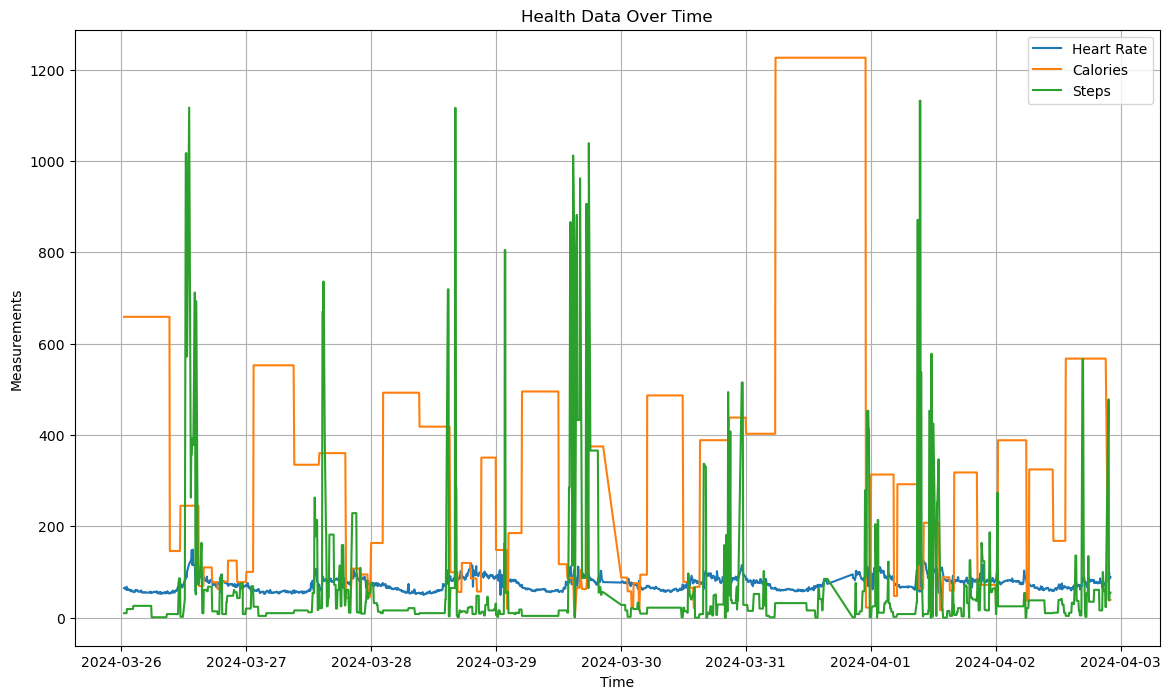

In [529]:
plt.figure(figsize=(14, 8))
plt.plot(final_df['startTime'], final_df['Heart Rate'], label='Heart Rate')
plt.plot(final_df['startTime'], final_df['Calories'], label='Calories')
plt.plot(final_df['startTime'], final_df['Steps'], label='Steps')
plt.xlabel('Time')
plt.ylabel('Measurements')
plt.title('Health Data Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [530]:
print("Columns in dataset:", final_df.columns)
print("First few rows of the dataset:")
print(final_df.head())

Columns in dataset: Index(['startTime', 'Heart Rate', 'Calories', 'Steps'], dtype='object')
First few rows of the dataset:
             startTime  Heart Rate    Calories  Steps
7  2024-03-26 00:33:00        65.0  658.749671   10.0
8  2024-03-26 00:36:00        66.0  658.749671   10.0
9  2024-03-26 00:41:00        65.0  658.749671   10.0
10 2024-03-26 00:48:00        64.0  658.749671   10.0
11 2024-03-26 00:51:00        62.0  658.749671   10.0


In [531]:
final_df['diff_heart_rate'] = final_df['Heart Rate'].diff().fillna(0)
final_df['cum_steps'] = final_df['Steps'].cumsum()

In [532]:
heart_rate_threshold = np.percentile(final_df['Heart Rate'], 25)
print(f"Heart rate threshold for sleep: {heart_rate_threshold}")

Heart rate threshold for sleep: 62.0


In [533]:
steps_threshold = 26

In [534]:
final_df['is_sleeping'] = (
    (final_df['Heart Rate'] < heart_rate_threshold) &
    (final_df['Steps'] <= steps_threshold)
).astype(int)

In [535]:
print("First few rows with 'is_sleeping' column:")
print(final_df[['startTime', 'Heart Rate', 'Steps', 'is_sleeping']].head())

First few rows with 'is_sleeping' column:
             startTime  Heart Rate  Steps  is_sleeping
7  2024-03-26 00:33:00        65.0   10.0            0
8  2024-03-26 00:36:00        66.0   10.0            0
9  2024-03-26 00:41:00        65.0   10.0            0
10 2024-03-26 00:48:00        64.0   10.0            0
11 2024-03-26 00:51:00        62.0   10.0            0


In [536]:
def extract_sleep_periods(final_df):
    sleep_periods = []
    current_period = None
    
    for i, row in final_df.iterrows():
        if row['is_sleeping'] == 1:
            if current_period is None:
                current_period = {'start': row['startTime'], 'end': row['startTime']}
            else:
                current_period['end'] = row['startTime']
        else:
            if current_period is not None:
                sleep_periods.append(current_period)
                current_period = None
    
    if current_period is not None:
        sleep_periods.append(current_period)
    
    return sleep_periods

In [537]:
sleep_periods = extract_sleep_periods(final_df)

In [538]:
if not sleep_periods:
    print("No sleep periods detected.")
else:
    print(f"Detected {len(sleep_periods)} sleep periods:")
    for i, period in enumerate(sleep_periods):
        start_time = pd.to_datetime(period['start'])
        end_time = pd.to_datetime(period['end'])
        duration = end_time - start_time
        hours = duration.total_seconds() / 3600
        
        if hours > 0:
            print(f"{i + 1}: Sleep period from {start_time} to {end_time} (Duration: {hours:.2f} hours)")

Detected 35 sleep periods:
4: Sleep period from 2024-03-26 01:35:00 to 2024-03-26 10:40:00 (Duration: 9.08 hours)
5: Sleep period from 2024-03-27 01:26:00 to 2024-03-27 02:17:00 (Duration: 0.85 hours)
6: Sleep period from 2024-03-27 02:27:00 to 2024-03-27 12:09:00 (Duration: 9.70 hours)
7: Sleep period from 2024-03-27 12:17:00 to 2024-03-27 12:23:00 (Duration: 0.10 hours)
8: Sleep period from 2024-03-27 14:10:00 to 2024-03-27 14:12:00 (Duration: 0.03 hours)
11: Sleep period from 2024-03-28 05:29:00 to 2024-03-28 06:59:00 (Duration: 1.50 hours)
12: Sleep period from 2024-03-28 07:19:00 to 2024-03-28 08:14:00 (Duration: 0.92 hours)
13: Sleep period from 2024-03-28 08:27:00 to 2024-03-28 13:39:00 (Duration: 5.20 hours)
15: Sleep period from 2024-03-29 06:49:00 to 2024-03-29 07:44:00 (Duration: 0.92 hours)
16: Sleep period from 2024-03-29 07:53:00 to 2024-03-29 07:54:00 (Duration: 0.02 hours)
17: Sleep period from 2024-03-29 08:04:00 to 2024-03-29 08:14:00 (Duration: 0.17 hours)
18: Sleep 

In [539]:
final_df_26 = final_df[final_df['startTime'].dt.day == 28]

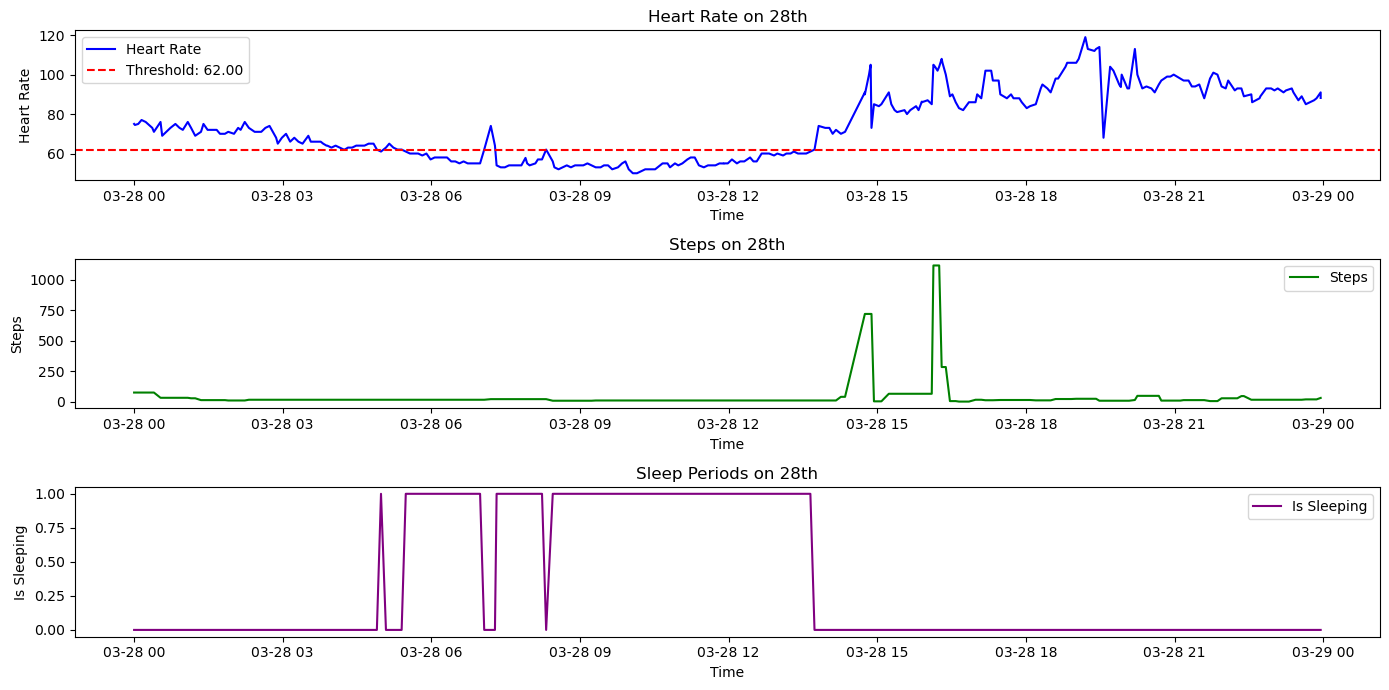

In [540]:
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
plt.plot(final_df_26['startTime'], final_df_26['Heart Rate'], label='Heart Rate', color='blue')
plt.axhline(y=heart_rate_threshold, color='red', linestyle='--', label=f'Threshold: {heart_rate_threshold:.2f}')
plt.title('Heart Rate on 28th')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(final_df_26['startTime'], final_df_26['Steps'], label='Steps', color='green')
plt.title('Steps on 28th')
plt.xlabel('Time')
plt.ylabel('Steps')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(final_df_26['startTime'], final_df_26['is_sleeping'], label='Is Sleeping', color='purple')
plt.title('Sleep Periods on 28th')
plt.xlabel('Time')
plt.ylabel('Is Sleeping')
plt.legend()

plt.tight_layout()
plt.show()

In [541]:
final_df_awake = final_df[final_df['is_sleeping'] == 0]

In [542]:
final_df_awake.to_csv("df_awake.csv", index=0)

In [543]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [544]:
print(final_df_awake.isnull().sum())

startTime          0
Heart Rate         0
Calories           0
Steps              0
diff_heart_rate    0
cum_steps          0
is_sleeping        0
dtype: int64


In [545]:
final_df_awake

,startTime,Heart Rate,Calories,Steps,diff_heart_rate,cum_steps,is_sleeping
7,2024-03-26 00:33:00,65.0,658.749671,10.0,0.0,10.0,0
8,2024-03-26 00:36:00,66.0,658.749671,10.0,1.0,20.0,0
9,2024-03-26 00:41:00,65.0,658.749671,10.0,-1.0,30.0,0
10,2024-03-26 00:48:00,64.0,658.749671,10.0,-1.0,40.0,0
11,2024-03-26 00:51:00,62.0,658.749671,10.0,-2.0,50.0,0
...,...,...,...,...,...,...,...
2227,2024-04-02 21:49:00,91.0,39.248850,38.0,-2.0,151046.0,0
2228,2024-04-02 21:50:00,87.0,39.248850,38.0,-4.0,151084.0,0
2229,2024-04-02 21:53:00,87.0,39.248850,55.0,0.0,151139.0,0
2230,2024-04-02 21:58:00,86.0,39.248850,55.0,-1.0,151194.0,0


In [546]:
features = ['Heart Rate', 'Steps', 'Calories']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(final_df_awake[features])

/Users/uvkuznetsov/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/uvkuznetsov/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/uvkuznetsov/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/uvkuznetsov/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

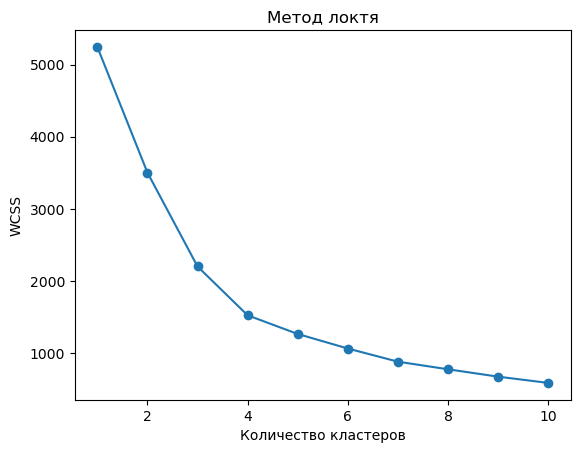

In [547]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.title('Метод локтя')
plt.show()

In [548]:
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
final_df_awake['Cluster'] = kmeans.fit_predict(data_scaled)

/Users/uvkuznetsov/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/cz/zhfvfw117t1d5x8lgy4wfqc40000gn/T/ipykernel_16123/3629612680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_awake['Cluster'] = kmeans.fit_predict(data_scaled)


   Heart Rate       Steps    Calories
0   77.629421   36.113279  356.320605
1  100.689083  552.603774  182.650848


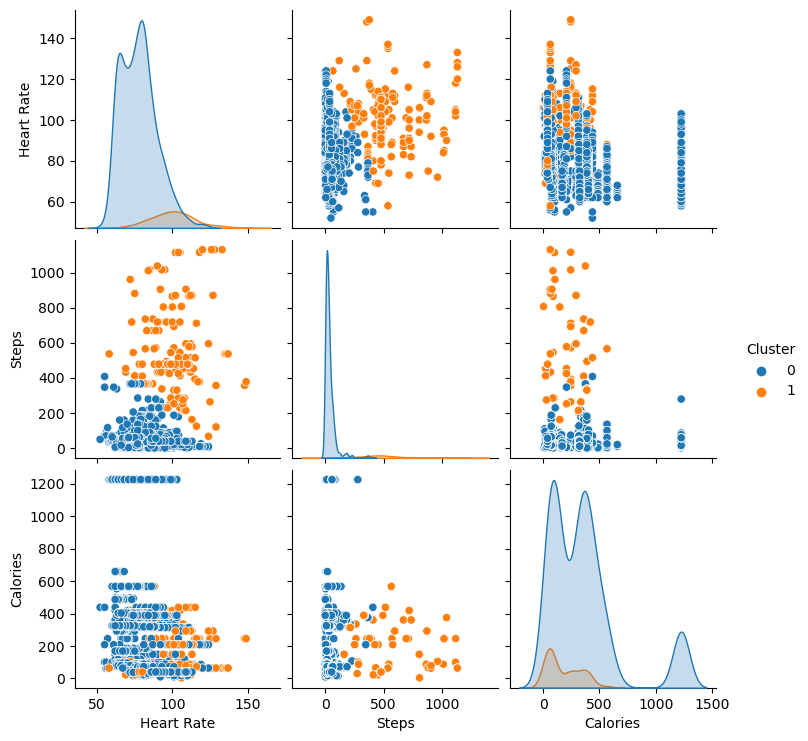

In [549]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_summary = pd.DataFrame(cluster_centers, columns=features)
print(cluster_summary)

sns.pairplot(final_df_awake, hue='Cluster', vars=features)
plt.show()

In [550]:
resting_cluster = cluster_summary['Heart Rate'].idxmin()
resting_heart_rate = cluster_summary.loc[resting_cluster, 'Heart Rate']
print(f"Средний пульс в состоянии покоя: {resting_heart_rate}")

Средний пульс в состоянии покоя: 77.6294212005212
